In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#helper Functions

%run '/content/drive/MyDrive/Project/After Mid Sem Work/pyNotebooks/helper_functions.ipynb'

     |████████████████████████████████| 6.3 MB 6.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
[*********************100%***********************]  1 of 1 completed


In [4]:

%run '/content/drive/MyDrive/Project/After Mid Sem Work/pyNotebooks/Constants.ipynb'

In [5]:
import datetime as dt

In [6]:
import numpy as np

In [7]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})

In [8]:
import matplotlib.pyplot as plt

In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [10]:
close_price_2015_2019 = fetch_close_price_for_time_range(ticker =sbi_ticker,start_year=2015 , end_year =2019) #upto jan 1 2019 , so till 2018 complete data

[*********************100%***********************]  1 of 1 completed


In [11]:
#For TCS Data
tcs_close_price_2015_2019 = fetch_close_price_for_time_range(ticker =tcs_ticker,start_year=2015 , end_year =2019)

[*********************100%***********************]  1 of 1 completed


##Visualizing Closing Prices

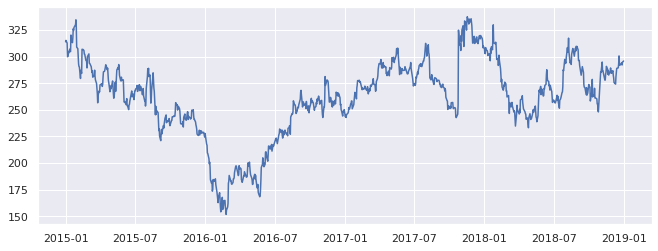

In [12]:
plt.plot(close_price_2015_2019) 

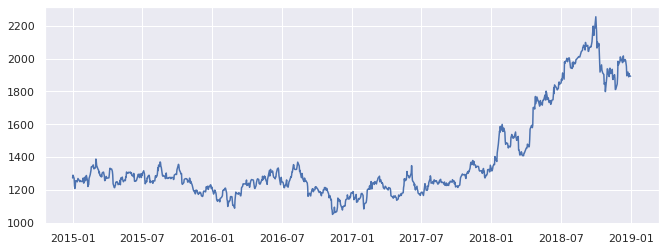

In [13]:
#For TCS Data
plt.plot(tcs_close_price_2015_2019)

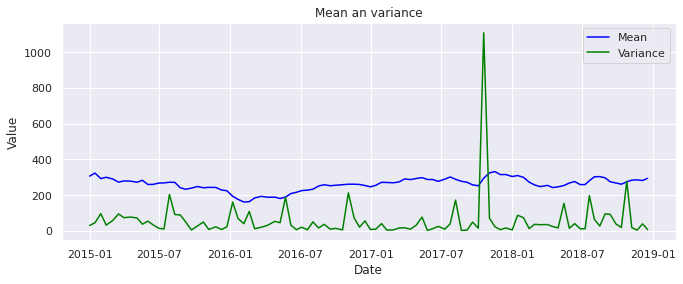

In [14]:
plot_mean_and_variance(close_price_2015_2019,"Close")

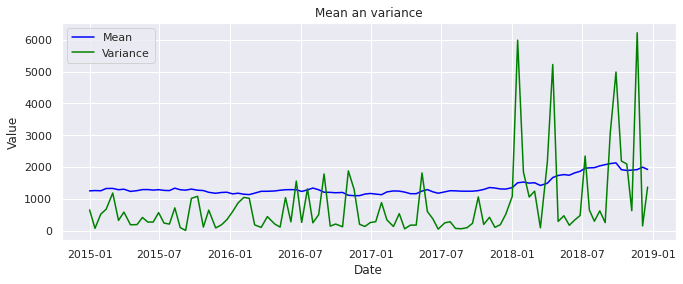

In [15]:
#For TCS Data
plot_mean_and_variance(tcs_close_price_2015_2019,"Close")

Clearly non stationary Time series data , since non constant mean(an upward trend) and indication of seasonality i.e repeated patterns

In [16]:
close_price_detrended = difference_transform(close_price_2015_2019['Close'],lags=1)

In [17]:
#For TCS Data
tcs_close_price_detrended = difference_transform(tcs_close_price_2015_2019['Close'],lags=1)

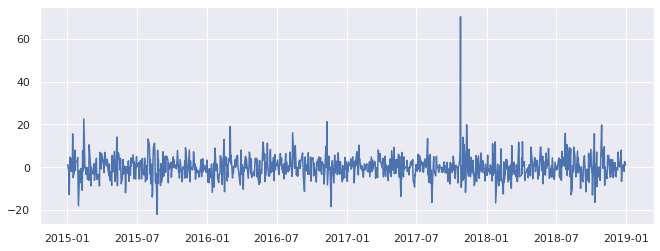

In [18]:
plt.plot(close_price_detrended)

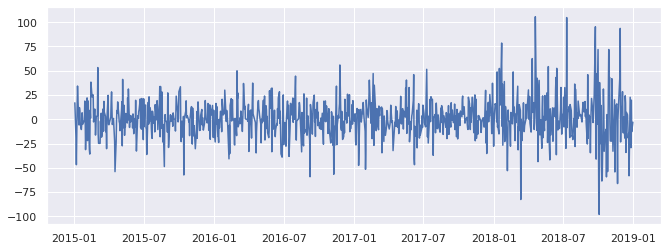

In [19]:
#For TCS Data
plt.plot(tcs_close_price_detrended)

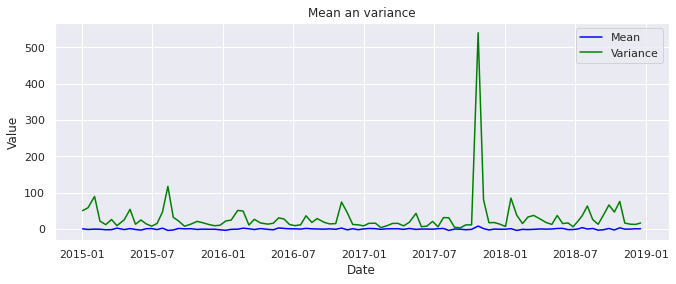

In [20]:
plot_mean_and_variance(pd.DataFrame(close_price_detrended,columns=['Close']),"Close")

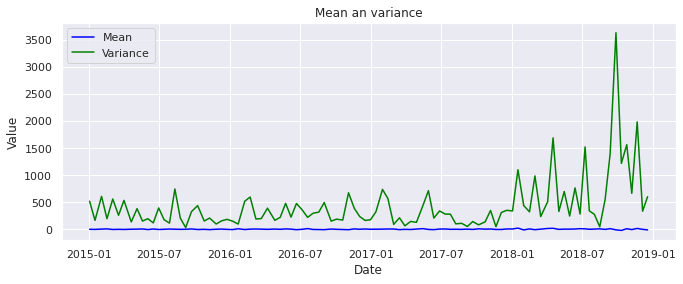

In [21]:
#For TCS Data
plot_mean_and_variance(pd.DataFrame(tcs_close_price_detrended,columns=['Close']),"Close")

Comment : Essentially the detrended data is a IID noise i.e 0 mean and cosntant non zero variance

###Plotting ACF , PACF 

In [59]:
def plot_pacf_custom(series,lags=50):
  plot_pacf(series[:50])
  plt.show()

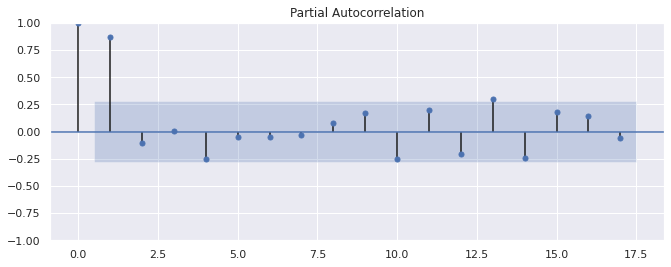

In [60]:
#plot pacf without detrend:
plot_pacf_custom(close_price_2015_2019['Close'])

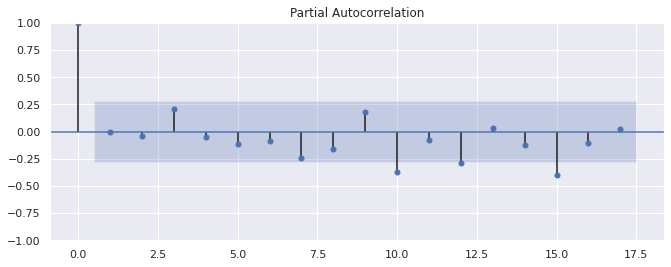

In [61]:
plot_pacf_custom(close_price_detrended)

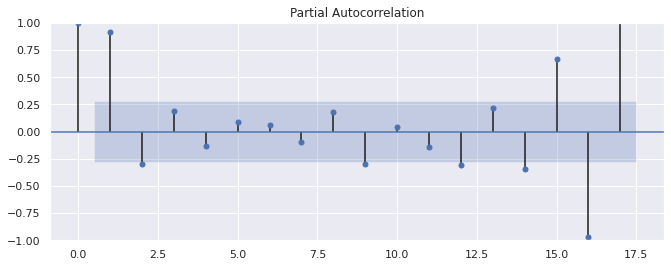

In [25]:
#For TCS Data
plot_pacf_custom(tcs_close_price_2015_2019['Close'])

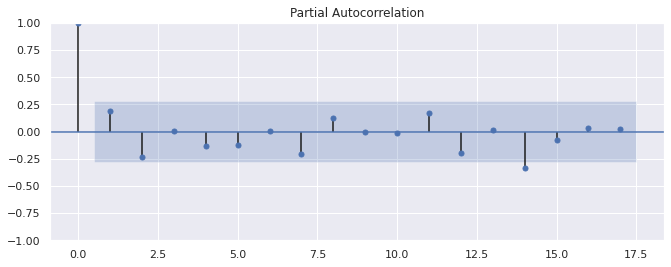

In [26]:
plot_pacf_custom(tcs_close_price_detrended)

Comment : Without removing trend our data shows correlation to the prev time step , however on removing trend we see out data is not correlated with its prev time steps 

This indicates that our data is a Random Walk , i.e of the form

Vt = V(t-1) + Noise , hence when we remove the trend by 1st differencing all we are left with is the noise  , which makes our data unpredictable for multisteps , at best we can use the prev time step in order to make the prediction for the next time step

###Check Seasonality in the data using boxplots

In [27]:
def visualize_seasonality_with_box_plots(series_to_plot): #input series with datetime index
  
  fig,axes = plt.subplots(1,3,figsize=(15, 8),sharey=True)

  series_to_plot['Year'] = series_to_plot.index.year
  series_to_plot['Month'] = series_to_plot.index.month
  series_to_plot['Weekday'] = series_to_plot.index.weekday
  
  sns.boxplot(data=series_to_plot, x='Year', y="Close",ax=axes[0])
  sns.boxplot(data=series_to_plot, x='Month', y='Close',ax=axes[1])
  sns.boxplot(data=series_to_plot, x='Weekday', y='Close',ax=axes[2])

  plt.show()






In [28]:
type(close_price_2015_2019)

pandas.core.frame.DataFrame

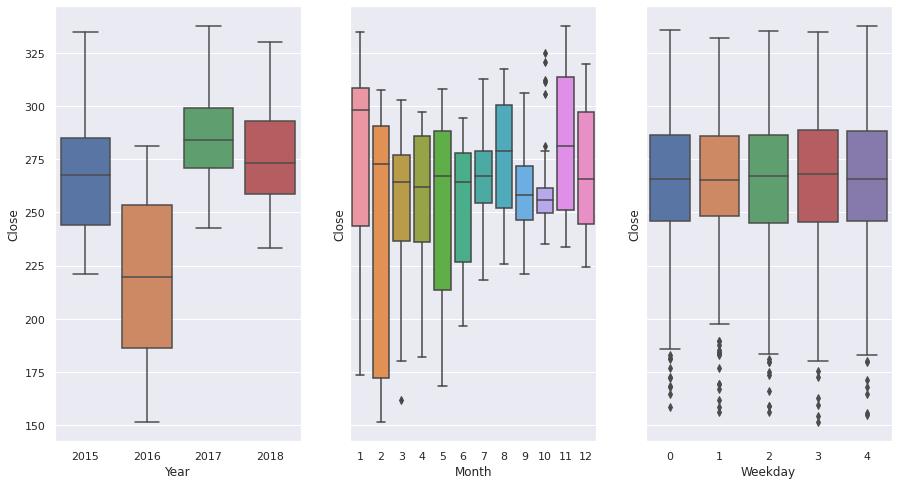

In [29]:
visualize_seasonality_with_box_plots(close_price_2015_2019)

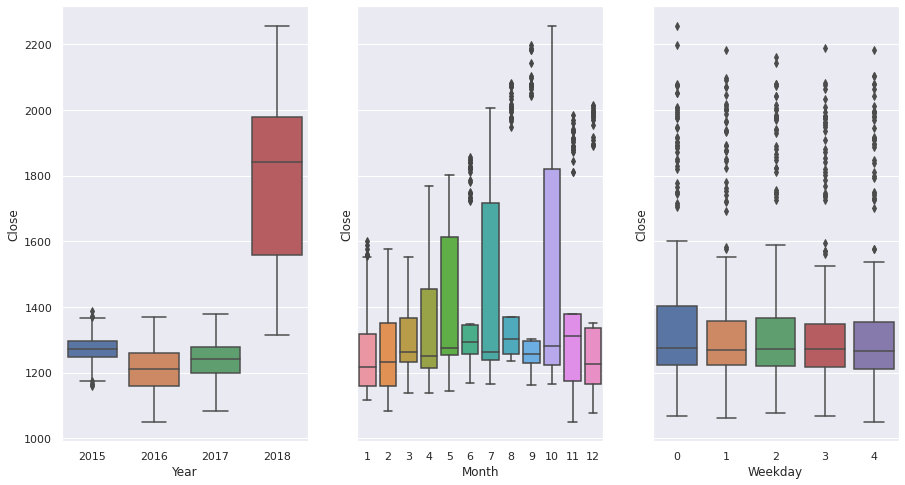

In [30]:
#For TCS Data
visualize_seasonality_with_box_plots(tcs_close_price_2015_2019)

Comment : The box plot shows that on weekday i.e business days , the median is same across each weekday , unlike in yearly and monthly plot . Indicating that there is a repeating pattern of close prices per weekday

###Fetching the entire dataset

In [31]:
sbi_data = fetch_data_from_yfinance(sbi_ticker)

[*********************100%***********************]  1 of 1 completed


In [32]:
#TCS Data
tcs_data = fetch_data_from_yfinance(tcs_ticker)

[*********************100%***********************]  1 of 1 completed


####Correlation of other attributes with Close Price

In [33]:
def correlation_heatmap(dataset):
    correlations = dataset.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    

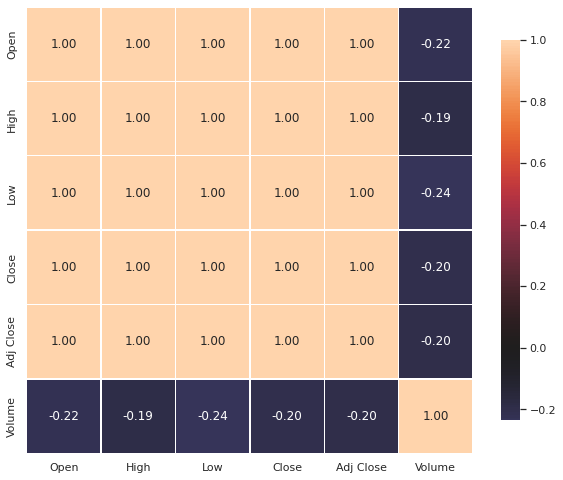

In [34]:
correlation_heatmap(sbi_data)

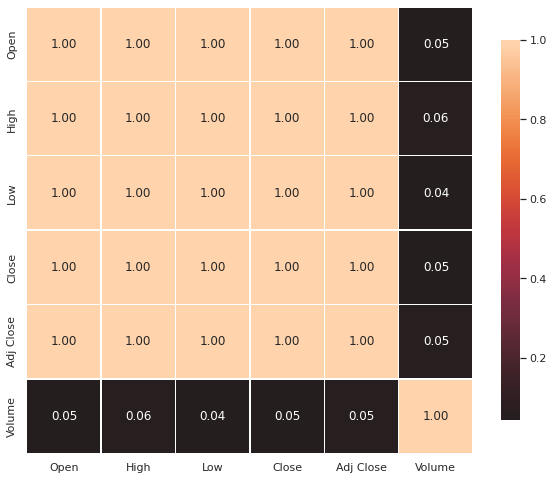

In [35]:
#For TCS Data
correlation_heatmap(tcs_data)

In [36]:
##Personal Opinion : Do not think this is useful , does not justify univariate forecasting i guess

Comment : Close Price is maximaly positively related to all the attributes other than volume

In [37]:

#brb

###Correalaton of Close Price and Adj close price

In [38]:
def plot_adj_close_price_and_close_price(dataset):#make sure the input is a dataframe with 'Adj Close' and 'Close' cols
  adj_close = dataset['Adj Close'][:50]
  close = dataset['Close'][:50]

  plt.plot(adj_close,label='Adj Close',color='g',linestyle="--")
  plt.plot(close,label='Close',color='b')

  plt.legend()
  plt.show()



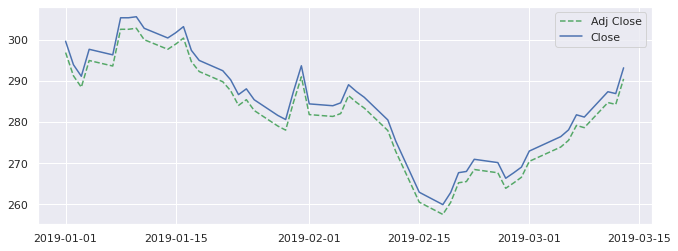

In [39]:
plot_adj_close_price_and_close_price(sbi_data[sbi_data.index.year==2019])

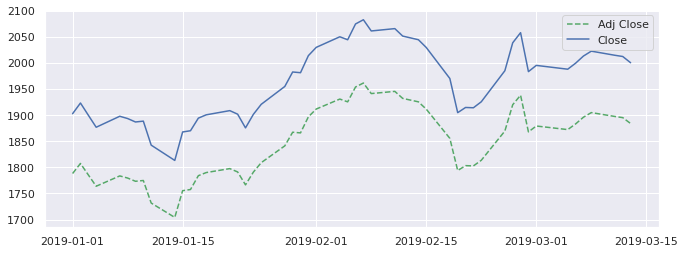

In [40]:
#For TCS Data
plot_adj_close_price_and_close_price(tcs_data[tcs_data.index.year==2019])

###Decompose Time Series into components

In [41]:
def decompose_time_series_custom(series,period=5):
  decomposed_sbi_closing_prices = decompose_time_series(time_series_data = series['Close'][:50],period = period) #func in helper func ipynb 
  decomposed_sbi_closing_prices.plot()
  plt.show()

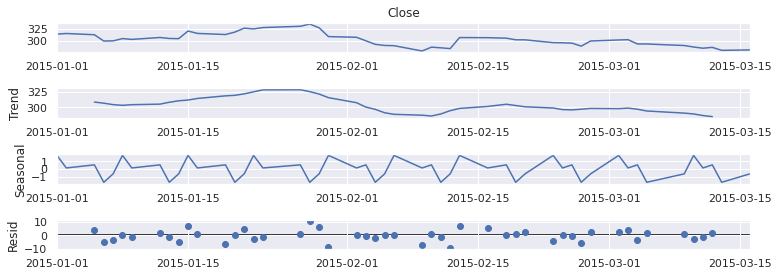

In [42]:
decompose_time_series_custom(close_price_2015_2019)

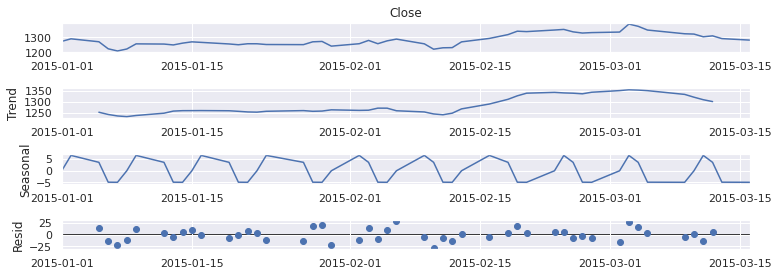

In [43]:
#For TCS Data
decompose_time_series_custom(tcs_close_price_2015_2019)

##Rough work (will Del latter)

In [44]:
close_prices  = sbi_data['Close']

In [45]:
len(close_prices.head(10))

10

In [46]:
np.unique(close_prices.index.weekday)

array([0, 1, 2, 3, 4, 5, 6])

In [47]:
series = close_prices[close_prices.index.year == 2019]

series[series.index.month== 1]

Date
2019-01-01    299.600006
2019-01-02    293.899994
2019-01-03    291.100006
2019-01-04    297.649994
2019-01-07    296.299988
2019-01-08    305.299988
2019-01-09    305.299988
2019-01-10    305.549988
2019-01-11    302.750000
2019-01-14    300.399994
2019-01-15    301.649994
2019-01-16    303.149994
2019-01-17    297.399994
2019-01-18    294.950012
2019-01-21    292.450012
2019-01-22    290.250000
2019-01-23    286.649994
2019-01-24    288.049988
2019-01-25    285.399994
2019-01-28    281.600006
2019-01-29    280.600006
2019-01-30    287.450012
2019-01-31    293.649994
Name: Close, dtype: float64

Do we need to arrange it as per business days? what does it mean to have closing prices on non business days

In [48]:
close_prices.groupby(close_prices.index.weekday).mean()  

Date
0    290.686832
1    290.422378
2    288.926305
3    289.891767
4    290.234980
5    229.649994
6    281.799988
Name: Close, dtype: float64

Checking something with seasonality

In [70]:
close_price_season = difference_transform(close_price_2015_2019['Close'],lags=5)

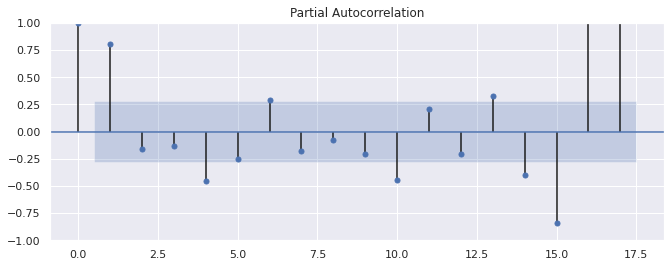

In [68]:
plot_pacf_custom(close_price_season,lags=10)

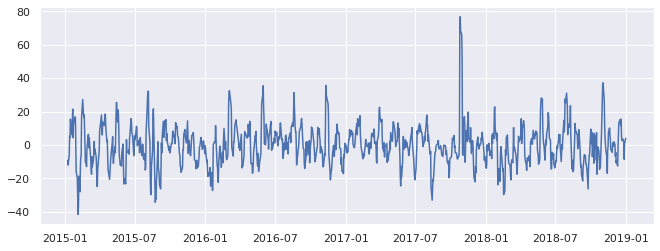

In [69]:
plt.plot(close_price_season)

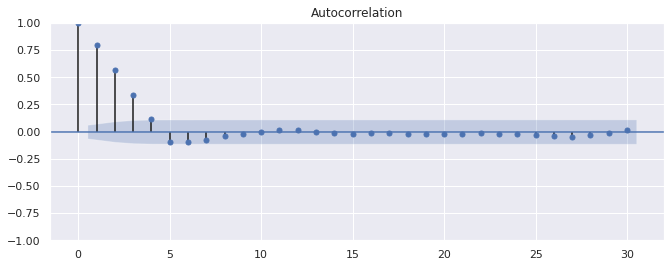

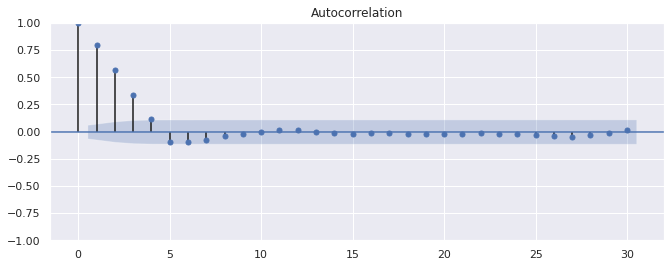

In [74]:
plot_acf(close_price_season)

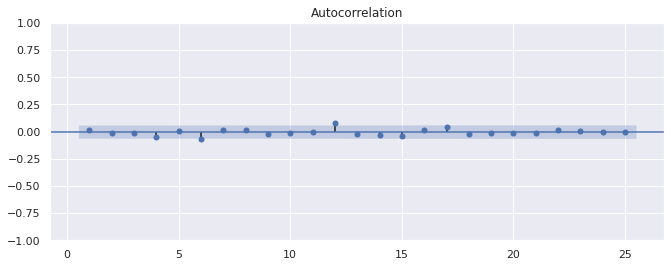

In [73]:
plot_acf_custom(close_price_detrended)

In [86]:
close_price_season1 = difference_transform(close_price_2015_2019['Close'],lags=10)

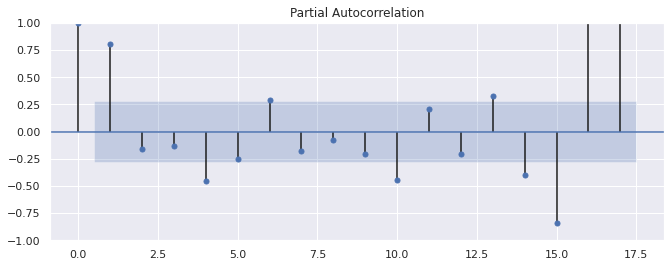

In [87]:
plot_pacf_custom(close_price_season,lags=20)

Checking out the daily diff corelation and weekly correlation


daily


In [75]:
daily_diff = close_price_2015_2019['Close'].diff()

In [76]:
daily_diff_autocorr = daily_diff.autocorr()

In [77]:
daily_diff_autocorr

0.014246771741393606

weekly

In [93]:
#downsampling weekly

weekly_df = close_price_2015_2019['Close'].resample(rule="b").last()#welll last removes the null values and returns till the row from where it is not null

In [94]:
weekly_diff = weekly_df.diff()

In [95]:
weekly_diff_autocorr = weekly_diff.autocorr()

In [96]:
weekly_diff_autocorr

0.01482389775211826

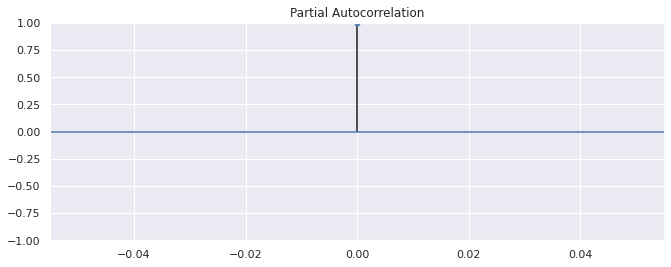

In [97]:
plot_pacf_custom(weekly_df)

WHATTTT! it is negative but still larger than daily


In [82]:
#why the hell is it negative!

In [85]:
  #NoW WHAT 